# Affiliated Packages: APLpy and WCSAxes

You can install the required packages by doing:

    pip install aplpy wcsaxes

## APLpy

[APLpy](http://aplpy.github.io/) (the Astronomical Plotting Library in Python) is a Python module aimed at producing publication-quality plots of astronomical imaging data in FITS format. The module uses Matplotlib, a powerful and interactive plotting package. It is capable of creating output files in several graphical formats, including EPS, PDF, PS, PNG, and SVG.

APLpy pre-dates Astropy, but has been updated to match requirements to be included as an Astropy-affiliated package.

In [ ]:
import aplpy
%matplotlib inline
import matplotlib.pyplot as plt

f = aplpy.FITSFigure('data/msx.fits')
f.show_colorscale(vmin=0, vmax=1.e-4)
f.show_contour('data/msx.fits',colors='white')
f.add_grid()
plt.show()

One downside of APLpy is that the ways of customizing figures is not always consistent with the Matplotlib API so it can be a bit confusing in some cases to switch between one and the other. So we have developed a new package called **WCSAxes** which aims to provide a more consistent user experience. In future, APLpy will be updated to use WCSAxes behind the scenes and will also provide more convenience layers on top of that package.

## WCSAxes

### Making basic plots

To make a similar plot to the one above, you would do the following:

In [ ]:
from astropy.wcs import WCS
wcs = WCS('data/msx.fits')

from astropy.io import fits
data = fits.getdata('data/msx.fits')

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, projection=wcs)
ax.imshow(data, vmin=0, vmax=1.e-4, origin='lower')
ax.grid(color='white', alpha=1, ls='solid')
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")

### Overlaying coordinate systems

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.25, 0.25, 0.6, 0.6], projection=wcs)
ax.imshow(data, vmin=0, vmax=1.e-4, origin='lower', cmap=plt.cm.gist_heat)

overlay = ax.get_coords_overlay('fk5')

ax.coords['glon'].set_ticks(color='white')
ax.coords['glat'].set_ticks(color='white')

ax.coords['glon'].set_axislabel('Galactic Longitude')
ax.coords['glat'].set_axislabel('Galactic Latitude')

ax.coords.grid(color='yellow', linestyle='solid', alpha=1)

overlay['ra'].set_ticks(color='white')
overlay['dec'].set_ticks(color='white')

overlay['ra'].set_axislabel('Right Ascension')
overlay['dec'].set_axislabel('Declination')

overlay.grid(color='white', linestyle='solid', alpha=1)

### Slicing data cubes

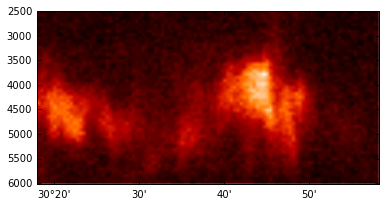

In [5]:
from wcsaxes import datasets

hdu = datasets.fetch_l1448_co_hdu()
wcs = WCS(hdu.header)
image_data = hdu.data

fig = plt.figure(figsize=(6,3))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs,
                  slices=(50, 'x', 'y'))

ax.coords[2].set_ticks(exclude_overlapping=True)
ax.imshow(image_data[:, :, 50], cmap=plt.cm.gist_heat)